In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import utils as ut

### Loading data
For the moment, every profile is stored in a ``pickle`` format. Let's see what the data looks like.

In [3]:
help(ut.load_data)

Help on function load_data in module utils:

load_data()
    Load data from pickle files in the 'profiles' directory.
    
    Returns:
        out_flattened (dict): Flattened dictionary containing all profiles.
        out_sorted (dict): Dictionary containing profiles sorted by file.



file profiles\profil_20190212.pkl contains 29 profiles, average length is 2265.83, std is 647.52
file profiles\profil_20190327.pkl contains 1 profiles, average length is 2832.00, std is 0.00
file profiles\profil_20200210.pkl contains 37 profiles, average length is 2866.70, std is 403.25
file profiles\profil_20200229.pkl contains 40 profiles, average length is 2317.03, std is 572.10
file profiles\profil_20200301.pkl contains 34 profiles, average length is 2098.74, std is 319.74
file profiles\profil_20220119.pkl contains 53 profiles, average length is 2436.04, std is 34.11
file profiles\profil_20220124.pkl contains 54 profiles, average length is 2416.70, std is 34.97
file profiles\profil_20220127.pkl contains 63 profiles, average length is 2139.13, std is 293.77
file profiles\profil_20220225.pkl contains 50 profiles, average length is 2445.74, std is 669.22


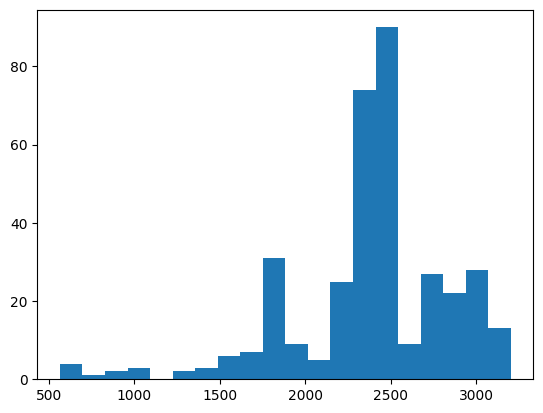

In [4]:
profiles_flattened, surveys = ut.load_data()

for survey, profiles in surveys.items():
    lengths = []
    for profile in profiles.values():
        lengths.append(len(profile))

    print(f'file {survey} contains {len(profiles)} profiles, average length is {np.mean(lengths):.2f}, std is {np.std(lengths):.2f}')

lengths = []
for profile in profiles_flattened.values():
    lengths.append(len(profile))
    
_ = plt.hist(lengths, 20)

Each file contains a dictionary where each key refers to a SMP profile from a given survey. Every profile is a dataframe with as many rows as there are depths observation, and columns give information on the properties of the snow.

In [5]:
profile = profiles_flattened['SMP_1399']
profile.columns

Index(['distance', 'force_median', 'fmax', 'L2012_lambda', 'L2012_f0',
       'L2012_delta', 'L2012_L', 'npeaks', 'B2009_psi', 'gradient_psi',
       'delta_bellaire', 'delta_bellairef5', 'layer'],
      dtype='object')

In [6]:
for profile in profiles_flattened.values():
    try:
        print(profile['layer'].unique())
    except:
        pass

['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'S11' 'S12' 'S13' nan
 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'WL' 'B']
['S1' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'S11' 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'WL' 'B' nan]
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'WL' 'B' nan]
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'S11' 'S12' 'S13' 'WL'
 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'WL' 'B' nan]
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'WL' 'B' nan]
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'WL' 'B' nan]
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'S11' 'WL' 'B' nan]
['S1' 'S2' 'S3' 'S4' 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'WL' 'B']
['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'WL' 'B']
['S1' 'S

Plotting one profile shows us where the weak layer is with respect to some other parameters:

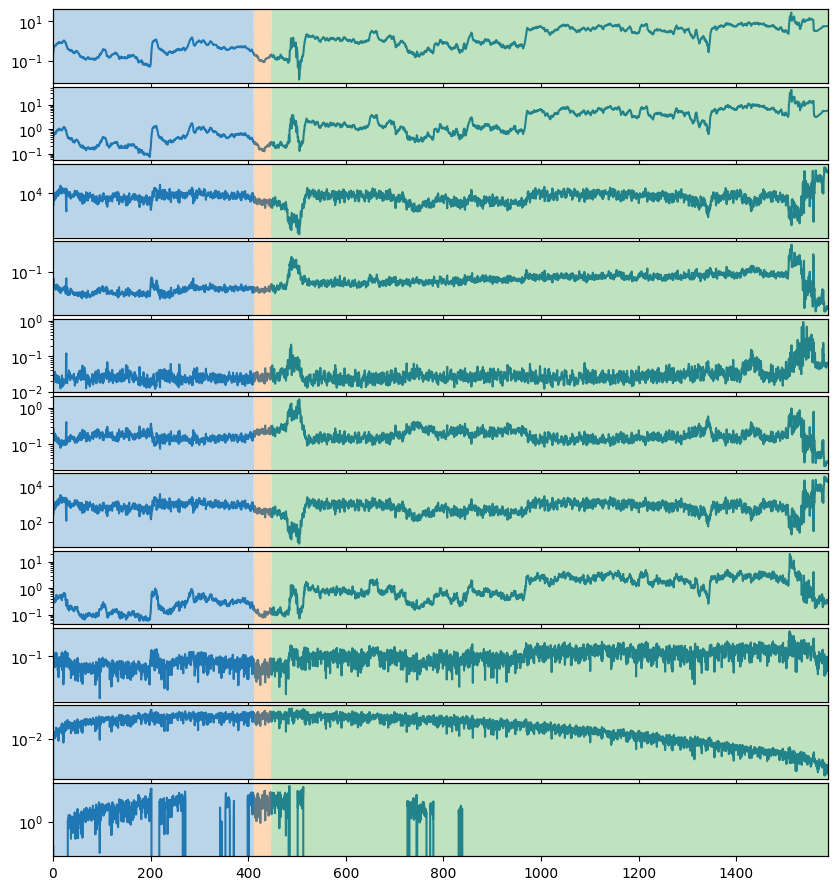

In [9]:
%matplotlib inline
features = profile.columns[1:-1]

fig, axs = plt.subplots(len(features), sharex='all', figsize=(10, len(features)))

for i, feature in enumerate(features):
    axs[i].plot(profile['distance'], np.abs(profile[feature]))
    axs[i].set_yscale('log')
    
    y = profile['layer'].fillna(method='ffill')
    y = y.apply(lambda x: 'S' if 'S' in x else x)
    ax2 = axs[i].twinx()

    for layer in y.unique():
        ax2.fill_between(profile['distance'], y == layer, 0, zorder=0, alpha=0.3)

    ax2.set_ylim(0, 1)
    ax2.set_yticks([])

axs[-1].set_xlim(0, profile['distance'].iloc[-1])
fig.subplots_adjust(hspace=0.05)

How different are every surveys? We can look at every profile from a given survey by plotting one of their features with respect to the weak layer location. 

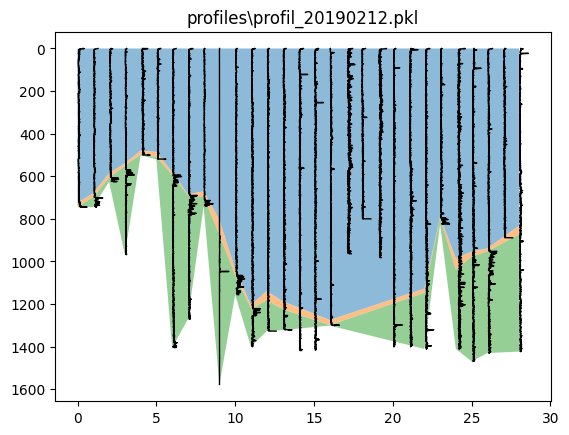

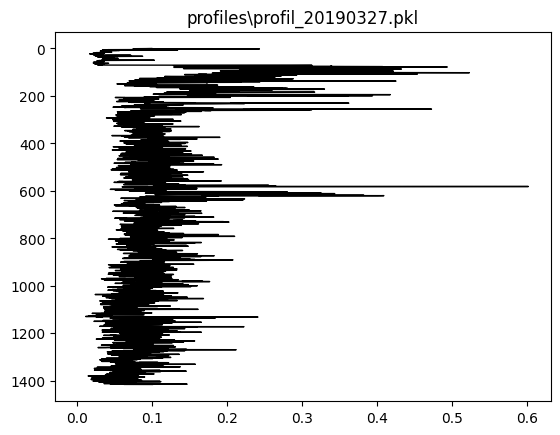

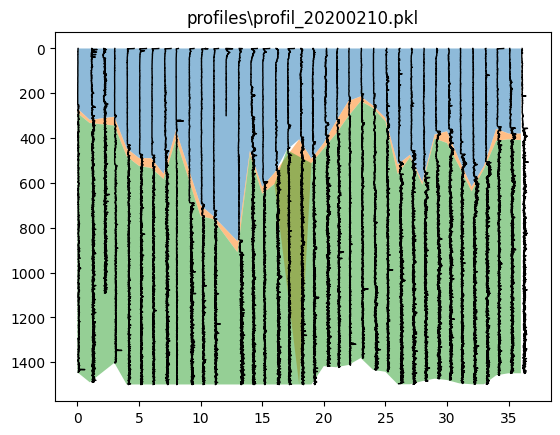

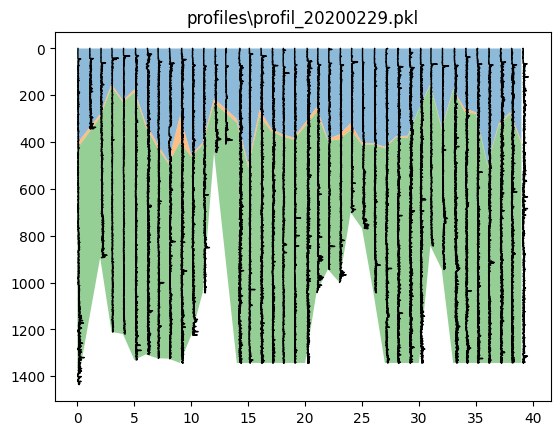

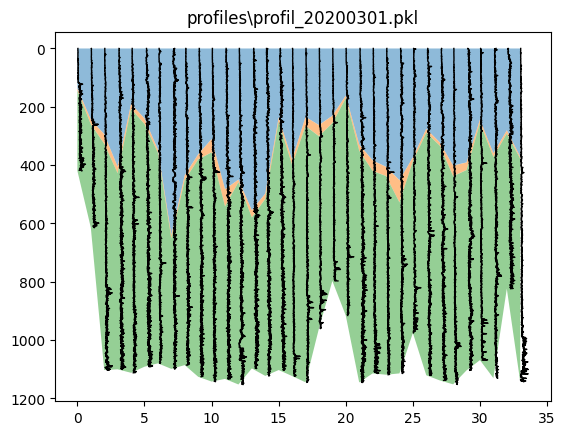

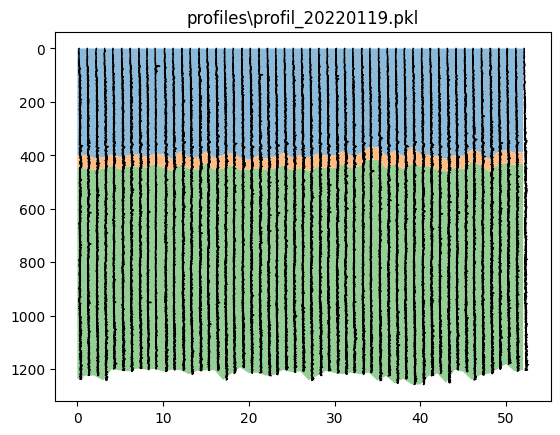

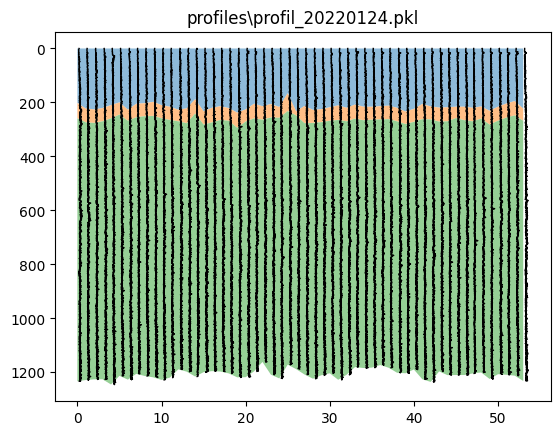

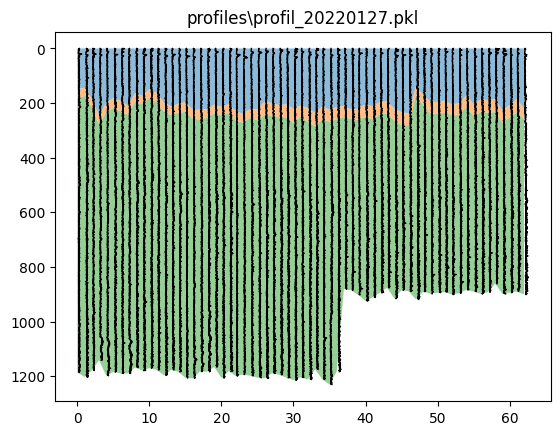

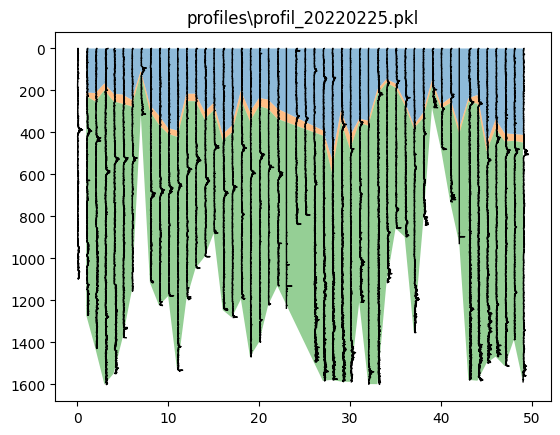

In [7]:
def plot_survey(survey, feature='force_median'):
    fig, ax = plt.subplots()

    layers = {}
    for i, (key, profile) in enumerate(survey.items()):
        plt.plot(i + 2 * np.log10(profile[feature]/profile[feature].max() + 1), profile['distance'], c='k', lw=1)
       
        try:
            y = profile['layer'].fillna(method='ffill')
            y = y.apply(lambda x: 'S' if 'S' in x else x)
            
            for layer in y.unique():
                if layer not in layers.keys():
                    layers[layer] = []

                indices = profile['distance'].loc[y == layer].iloc[[0, -1]]
                layers[layer].append((i, *indices.values))
        
        except Exception as e:
            pass
    
    for key, layer in layers.items():
        ax.fill_between(*np.array(layer).T, alpha=0.5)

    ax.invert_yaxis()
    return fig, ax

for key, survey in surveys.items():
    fig, ax = plot_survey(survey, feature='L2012_L')
    ax.set_title(key)


Looking at multiple profiles in this manner, we learn that:
- For a given survey, the weak layer is relatively constant. Therefore, we cannot use depth solely as an indicator as it won't do a really good job at generalizing. 
- The maximum depth is varying on a profile basis - this will need to be accounted for when using a U-Net or some other DL architecture.

Let's define some helper functions that will help us manipulate our data. For now, computing a few rolling windows of the available data will help us easily generate features to work with.

In [8]:
help(ut.pickle_to_data)

Help on function pickle_to_data in module utils:

pickle_to_data(survey_dict, nwindow=100)
    Takes as input a dictionary of DataFrames containing the profile information. 
    Computes, for different window sizes, rolling statistics for the data. 
    
    Args:
        survey_dict (dict): The various profiles 
    
    Returns:
        X (DataFrame): The normalized data
        y (DataFrame or maybe Series idk): The target variable.



In [9]:
nwindows = [10, 100, 1000]
X, y = ut.pickle_to_data(profiles_flattened, nwindow=nwindows)
X = X.dropna()
y = y.loc[X.index]
X

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  ret

,force_median_mean_rolling_10,fmax_mean_rolling_10,L2012_lambda_mean_rolling_10,L2012_f0_mean_rolling_10,L2012_delta_mean_rolling_10,L2012_L_mean_rolling_10,npeaks_mean_rolling_10,B2009_psi_mean_rolling_10,gradient_psi_mean_rolling_10,delta_bellaire_mean_rolling_10,...,fmax_cumsum,L2012_lambda_cumsum,L2012_f0_cumsum,L2012_delta_cumsum,L2012_L_cumsum,npeaks_cumsum,B2009_psi_cumsum,gradient_psi_cumsum,delta_bellaire_cumsum,delta_bellairef5_cumsum
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.010195,0.001230,0.010913,0.177805,0.435839,0.009681,0.007392,0.371912,0.392365,0.468604
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.060252,0.001629,0.046269,0.503276,1.051266,0.013627,0.036147,0.749876,0.784751,0.937208
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.121993,0.003751,0.066654,0.719189,1.411476,0.028225,0.093957,1.118981,1.177155,1.405811
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.200344,0.006398,0.086517,0.962451,1.743883,0.045394,0.161868,1.460592,1.569527,1.874415
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.278694,0.009309,0.103928,1.326754,2.064739,0.063803,0.223882,1.824722,1.961968,2.343019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818546,0.203552,0.134688,0.630030,0.000010,0.048442,0.002572,0.731149,0.011730,0.442944,0.356,...,222.891868,27.682076,20.148332,76.898293,308.491840,95.976637,181.498280,1404.387311,1134.377427,1002.656965
818547,0.203808,0.134945,0.604300,0.000013,0.047644,0.002873,0.709793,0.012228,0.443077,0.356,...,223.029761,28.078990,20.148362,76.942013,308.497040,96.516633,181.513930,1404.831999,1134.733427,1002.971888
818548,0.204347,0.135249,0.609412,0.000013,0.046866,0.002802,0.714227,0.012395,0.442662,0.356,...,223.168125,28.558993,20.148381,76.990011,308.501036,97.129606,181.527351,1405.271243,1135.089427,1003.286811
818549,0.205130,0.135773,0.591867,0.000013,0.048186,0.002987,0.700023,0.012311,0.442728,0.356,...,223.307586,29.032962,20.148394,77.049601,308.505109,97.737430,181.538304,1405.713662,1135.445428,1003.601733


If we concatenate every profile from every survey, concatenating every data point results in a large amount of rows! Let's see what the data looks like. We will ask ourselves the following questions:

1. How is data distributed amongst the different layers? For now, we only investigate the weak layers and consider anything else to be grouped together. What % of our data is weak layers?
2. How are the profiles correlated amongst surveys? Do different profiles across different surveys show wildly different data?

To adress point #1, we can easily look at the distribution of 0s and 1s across our entire data. Around 3% of our data points are weak layers.m

([<matplotlib.axis.XTick at 0x157bab178b0>,
 [Text(0, 0, 'B'), Text(1, 0, 'S'), Text(2, 0, 'WL')])

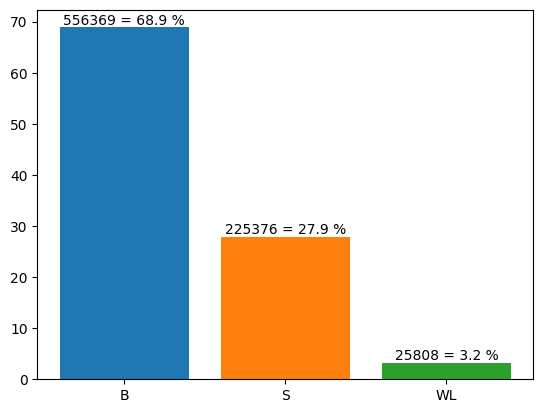

In [10]:
counts = y.value_counts()
for i, c in enumerate(counts):
    plt.bar(i, 100 * c/counts.sum())
    plt.text(i, 100 * c/counts.sum(), f'{c:.0f} = {100 * c/counts.sum():.1f} %', ha='center', va='bottom')

#plt.bar(0, 100 * n_wl/ntot)
#plt.bar(1, 100 * n_other/ntot)
plt.xticks(np.arange(len(counts)), [i[0] for i in counts.index.values])

Now, for point #2, we will use PCA to see how every surveys are distributed inside the entire data domain we have.

In [11]:
# there doesn't seem to be a clear, linear transformation that easily splits the data!
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pipe.fit(X)
Z = pipe.transform(X)

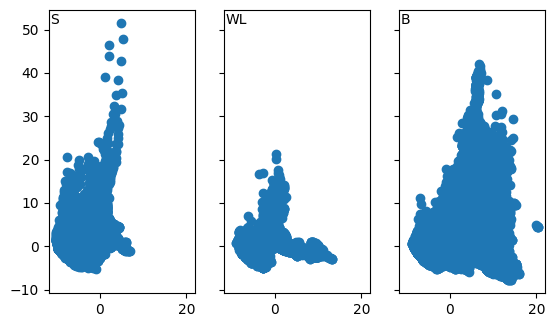

In [13]:
# plotting the entire data shows this distribution
isweak = y.astype(bool).values.reshape(-1)

fig, axs = plt.subplots(1, 3, sharex='all', sharey='all')
for i, layer in enumerate(y[0].unique()):
    axs[i].scatter(Z[y[0] == layer, 0], Z[y[0] == layer, 1], label=layer,)# s=0.5, alpha=0.01)
    axs[i].set_aspect(1)
    axs[i].text(0.01, 0.99, layer, ha='left', va='top', transform=axs[i].transAxes)

xlim = axs[-1].get_xlim()
ylim = axs[-1].get_ylim()

profiles\profil_20190212.pkl


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  return func(x, start, end, min_periods, *numba_args)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\window\rolling.py:655: RuntimeWarning: All-NaN slice encountered
  ret

profiles\profil_20190327.pkl
profiles\profil_20200210.pkl
profiles\profil_20200229.pkl
profiles\profil_20200301.pkl
profiles\profil_20220119.pkl
profiles\profil_20220124.pkl
profiles\profil_20220127.pkl
profiles\profil_20220225.pkl


(-10.868250024477717, 54.52246091633381)

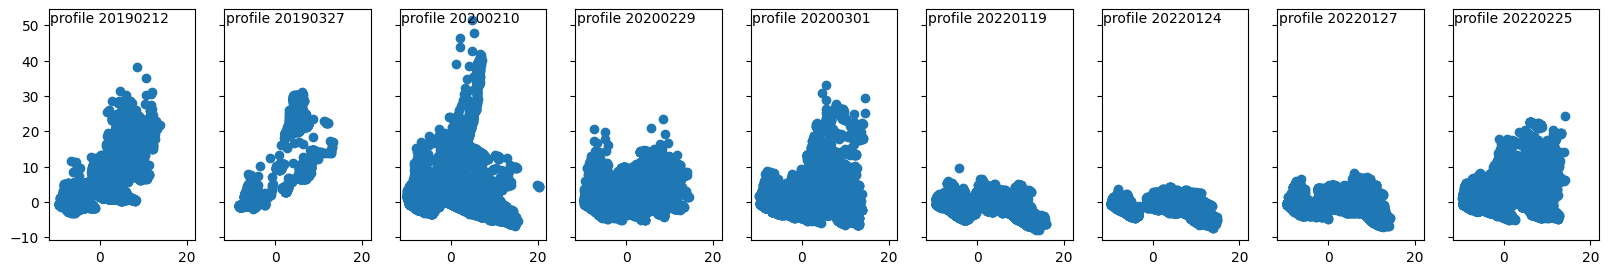

In [17]:
import os
import glob
files = glob.glob('profiles/*.pkl')

fig, axs = plt.subplots(1, len(files), sharex='all', sharey='all', figsize=(20, 3))

for i, file in enumerate(files):

    with open(file, 'rb') as f:
        print(file)
        tmp = pickle.load(f)

    subX, suby = ut.pickle_to_data(tmp, nwindow=nwindows)
    subX = subX.dropna()
    suby = suby.loc[subX.index]

    subZ = pipe.transform(subX)

    axs[i].scatter(subZ[:, 0], subZ[:, 1])
    axs[i].text(0.01, 0.99, 'profile ' + file.split('_')[1].split('.')[0], ha='left', va='top', transform=axs[i].transAxes)

axs[-1].set_xlim(xlim)
axs[-1].set_ylim(ylim)

Surveys #4, 6, 7, 8 and 9 all seem to have very similar characteristics. Surveys 1, 2, 3, and 5 are more different. Interestingly enough, the weak layers are all overlapping the rest of the data, apart from survey #6 where there is a clear cluster (still overlapping however).

 In the next notebook, we will use the surveys #1 through #5 to create a training dataset, while keeping #6 through 9 for validation.